 # Assignment 07
 

#### 1. Load training data and plot


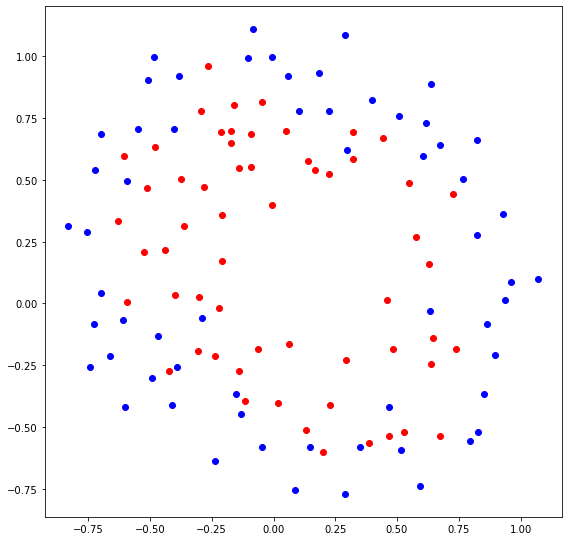

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

x_data = pointX
y_data = pointY
l_data = label

plt.figure(figsize=(8, 8))
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [3]:
def g(x,y,theta):
    sum = 0
    for i in range(len(theta)):
        for j in range(len(theta[0])):
            sum += theta[i][j]*(x**i)*(y**j)
    return sum

def dg_dtheta(x,y,i,j):
    return ((x**i) * (y**j))

def sigmoid(z):
    return 1/(1+np.exp(-z))

def j1(x,y,l,theta):
    total = 0
    if l == 1:
        total = - np.log10(sigmoid(g(x,y,theta)))
    if l == 0:
        total = - np.log10(1 - sigmoid(g(x,y,theta)))
    return total

def sumtheta2(theta):
    sum = 0
    for i in range(len(theta)):
        for j in range(len(theta[0])):
            sum += theta[i][j]**2
    return sum

print('function defined!')

function defined!


In [4]:
col1 = []


theta = np.ones([6,6]).tolist()

m = len(x_data)
alpha = 1
lbda = 0

# print(sigmoid(g(x_data[0],y_data[0],theta)) - l_data[0])
# print(dg_dtheta(x_data[0],y_data[0],1,2))

for iteration in range(1000):

    for ii in range(len(theta)):
        for jj in range(len(theta[0])):
            sum1m = 0
            for i in range(m):
                sum1m += (sigmoid(g(x_data[i],y_data[i],theta)) - l_data[i]) *dg_dtheta(x_data[i],y_data[i],ii,jj)
            total = sum1m + lbda*theta[ii][jj]
            theta[ii][jj] = theta[ii][jj] - alpha*total/m

    # print(alpha*total/m)

    sumj = 0
    for i in range(m):
        sumj += j1(x_data[i],y_data[i],l_data[i],theta)
        
    if(np.mod(iteration,100) == 0):
        print(iteration, sumj/m + lbda/2*sumtheta2(theta))
    
    col1.append(sumj/m + lbda/2*sumtheta2(theta))
    
print (np.array(theta))
print('Train completed!')

0 0.7312597958170056
100 0.21300850955564138
200 0.1791712765857995
300 0.16615594248631693
400 0.1594546110115676
500 0.15545041116725627
600 0.15282172909147468
700 0.1509755342912325
800 0.14960936803246952
900 0.14855472636354308
[[ 3.4527804   3.72506582 -5.46671262 -0.5248113  -3.98802624 -0.66364678]
 [ 2.34094884 -4.74418676 -0.95601025 -1.36947981 -1.13738099 -0.64073075]
 [-5.97821555 -1.57361479 -1.73385567 -0.74419319 -0.64061033 -0.02444791]
 [ 0.72924975  0.45719301  0.94437894  0.91849502  0.83545875  0.95891328]
 [-4.83170464 -0.34474222 -0.30110348  0.26445403  0.33354239  0.58260647]
 [-0.84962121  0.90352916  0.82026344  0.97241946  0.89701031  0.97853069]]
Train completed!


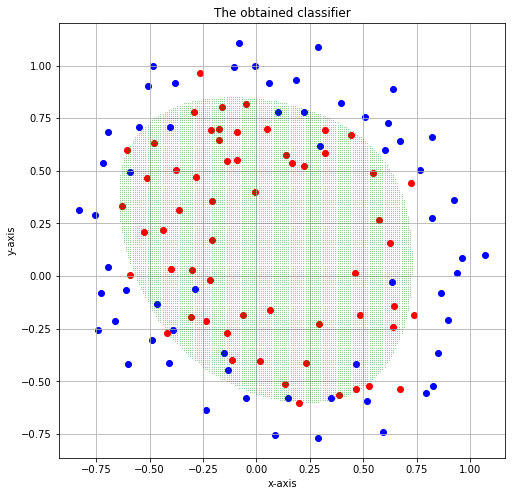

In [48]:
plt.plot(col1)
plt.show()


In [ ]:
xx = yy = np.arange(-1, 1.3, 0.01)
X1 = []; Y1 = []

for i in xx:
    for j in yy:
        if g(i, j, theta) > 0 :
            X1.append(i)
            Y1.append(j)

plt.figure(figsize=(8, 8))
plt.plot(X1, Y1, marker='.', c='g', linewidth=0, markersize=0.3)

plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')

plt.title('The obtained classifier')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.grid()
plt.show()




In [ ]:
col2 = []
theta = np.ones([6,6]).tolist()

m = len(x_data)
alpha = 1
lbda = 0.00001

# print(sigmoid(g(x_data[0],y_data[0],theta)) - l_data[0])
# print(dg_dtheta(x_data[0],y_data[0],1,2))

for iteration in range(1000):

    for ii in range(len(theta)):
        for jj in range(len(theta[0])):
            sum1m = 0
            for i in range(m):
                sum1m += (sigmoid(g(x_data[i],y_data[i],theta)) - l_data[i]) *dg_dtheta(x_data[i],y_data[i],ii,jj)
            total = sum1m + lbda*theta[ii][jj]
            theta[ii][jj] = theta[ii][jj] - alpha*total/m

    # print(alpha*total/m)

    sumj = 0
    for i in range(m):
        sumj += j1(x_data[i],y_data[i],l_data[i],theta)
        
    if(np.mod(iteration,100) == 0):
        print(iteration, sumj/m + lbda/2*sumtheta2(theta))

print (np.array(theta))
print('Train completed!')

In [ ]:
xx = yy = np.arange(-1, 1.3, 0.01)
X1 = []; Y1 = []

for i in xx:
    for j in yy:
        if g(i, j, theta) > 0 :
            X1.append(i)
            Y1.append(j)

plt.figure(figsize=(8, 8))
plt.plot(X1, Y1, marker='.', c='g', linewidth=0, markersize=0.3)

plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')

plt.title('The obtained classifier')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.grid()
plt.show()



In [ ]:
col3 = []
theta = np.ones([6,6]).tolist()

m = len(x_data)
alpha = 1
lbda = 0.00001

# print(sigmoid(g(x_data[0],y_data[0],theta)) - l_data[0])
# print(dg_dtheta(x_data[0],y_data[0],1,2))

for iteration in range(1000):

    for ii in range(len(theta)):
        for jj in range(len(theta[0])):
            sum1m = 0
            for i in range(m):
                sum1m += (sigmoid(g(x_data[i],y_data[i],theta)) - l_data[i]) *dg_dtheta(x_data[i],y_data[i],ii,jj)
            total = sum1m + lbda*theta[ii][jj]
            theta[ii][jj] = theta[ii][jj] - alpha*total/m

    # print(alpha*total/m)

    sumj = 0
    for i in range(m):
        sumj += j1(x_data[i],y_data[i],l_data[i],theta)
        
    if(np.mod(iteration,100) == 0):
        print(iteration, sumj/m + lbda/2*sumtheta2(theta))

print (np.array(theta))
print('Train completed!')

In [ ]:
xx = yy = np.arange(-1, 1.3, 0.01)
X1 = []; Y1 = []

for i in xx:
    for j in yy:
        if g(i, j, theta) > 0 :
            X1.append(i)
            Y1.append(j)

plt.figure(figsize=(8, 8))
plt.plot(X1, Y1, marker='.', c='g', linewidth=0, markersize=0.3)

plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')

plt.title('The obtained classifier')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.grid()
plt.show()